# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

### Solution Approach and Steps

    Data Understanding
    Data Cleansing
    Deeper Data Understanding by Visualization
    Preparing the Data for Modelling
    Splitting the date into Train and Test
    Scaling the train Data (Fit & transform)
    Linear Regression Model creation
    Scaling the test Data (Only Transform)
    LR Residual Analysis to check the non-linearity of Data
    LR Model Validation
    Ridge Regression
    Lasso REgression
    Comparision of LR, Ridge and Lasso regression
    Comparision of Coefficients. 
    Detailing of which coefficients have higher influence on target variable.

### Importing Libraries

In [416]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data Cleansing


In [59]:
# Data elements with some data missing are as follows: 
#MiscFeature (only 54 elements)
#Fence (only 281 elements)
#PoolQC (only 7 elements)
#Alley          91 non-null     object
#FireplaceQu    770 non-null    object
#LotFrontage    1201 non-null   float64
#GarageQual     1379 non-null   object 
#GarageCond     1379 non-null
#GarageType     1379 non-null   object 
#GarageYrBlt    1379 non-null   float64
#GarageFinish   1379 non-null   object 
#Electrical     1459 non-null   object
#BsmtFinType2   1422 non-null   object
#BsmtQual       1423 non-null   object 
#BsmtCond       1423 non-null   object 
#BsmtExposure   1422 non-null   object 
#BsmtFinType1   1423 non-null   object 
#MasVnrType     1452 non-null   object 
#MasVnrArea     1452 non-null   float64

### Removing Columns where significant amount of Data is missing

In [7]:
dataset.drop('MiscFeature', axis='columns', inplace=True)

In [9]:
dataset.drop('Fence', axis='columns', inplace=True)

In [10]:
dataset.drop('PoolQC', axis='columns', inplace=True)

In [11]:
dataset.drop('Alley', axis='columns', inplace=True)

In [13]:
dataset.drop('FireplaceQu', axis='columns', inplace=True)

In [23]:
# There are only 1201 elements in this column. Which means about 17% of data is missing. Hence taking a decision to remove the entire column, rather than data transformation
dataset.drop('LotFrontage', axis='columns', inplace=True)

In [25]:
newdataset = dataset

### Removing Rows that have Null values.

In [26]:
newdataset = newdataset.dropna()

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

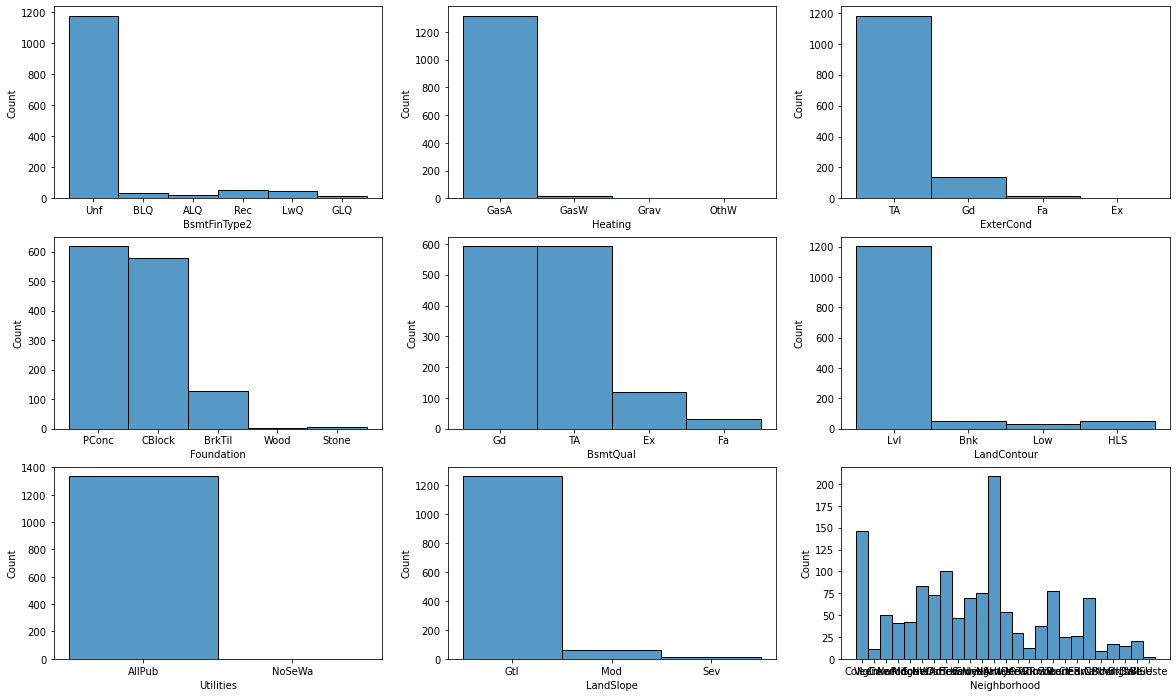

In [54]:
# Randomly checking if there are any Data Anomolies or Structural Errors. And did not find any.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.histplot(newdataset['BsmtFinType2'])
plt.subplot(3,3,2)
sns.histplot(newdataset['Heating'])
plt.subplot(3,3,3)
sns.histplot(newdataset['ExterCond'])
plt.subplot(3,3,4)
sns.histplot(newdataset['Foundation'])
plt.subplot(3,3,5)
sns.histplot(newdataset['BsmtQual'])
plt.subplot(3,3,6)
sns.histplot(newdataset['LandContour'])
plt.subplot(3,3,7)
sns.histplot(newdataset['Utilities'])
plt.subplot(3,3,8)
sns.histplot(newdataset['LandSlope'])
plt.subplot(3,3,9)
sns.histplot(newdataset['Neighborhood'])

# Data Visualization

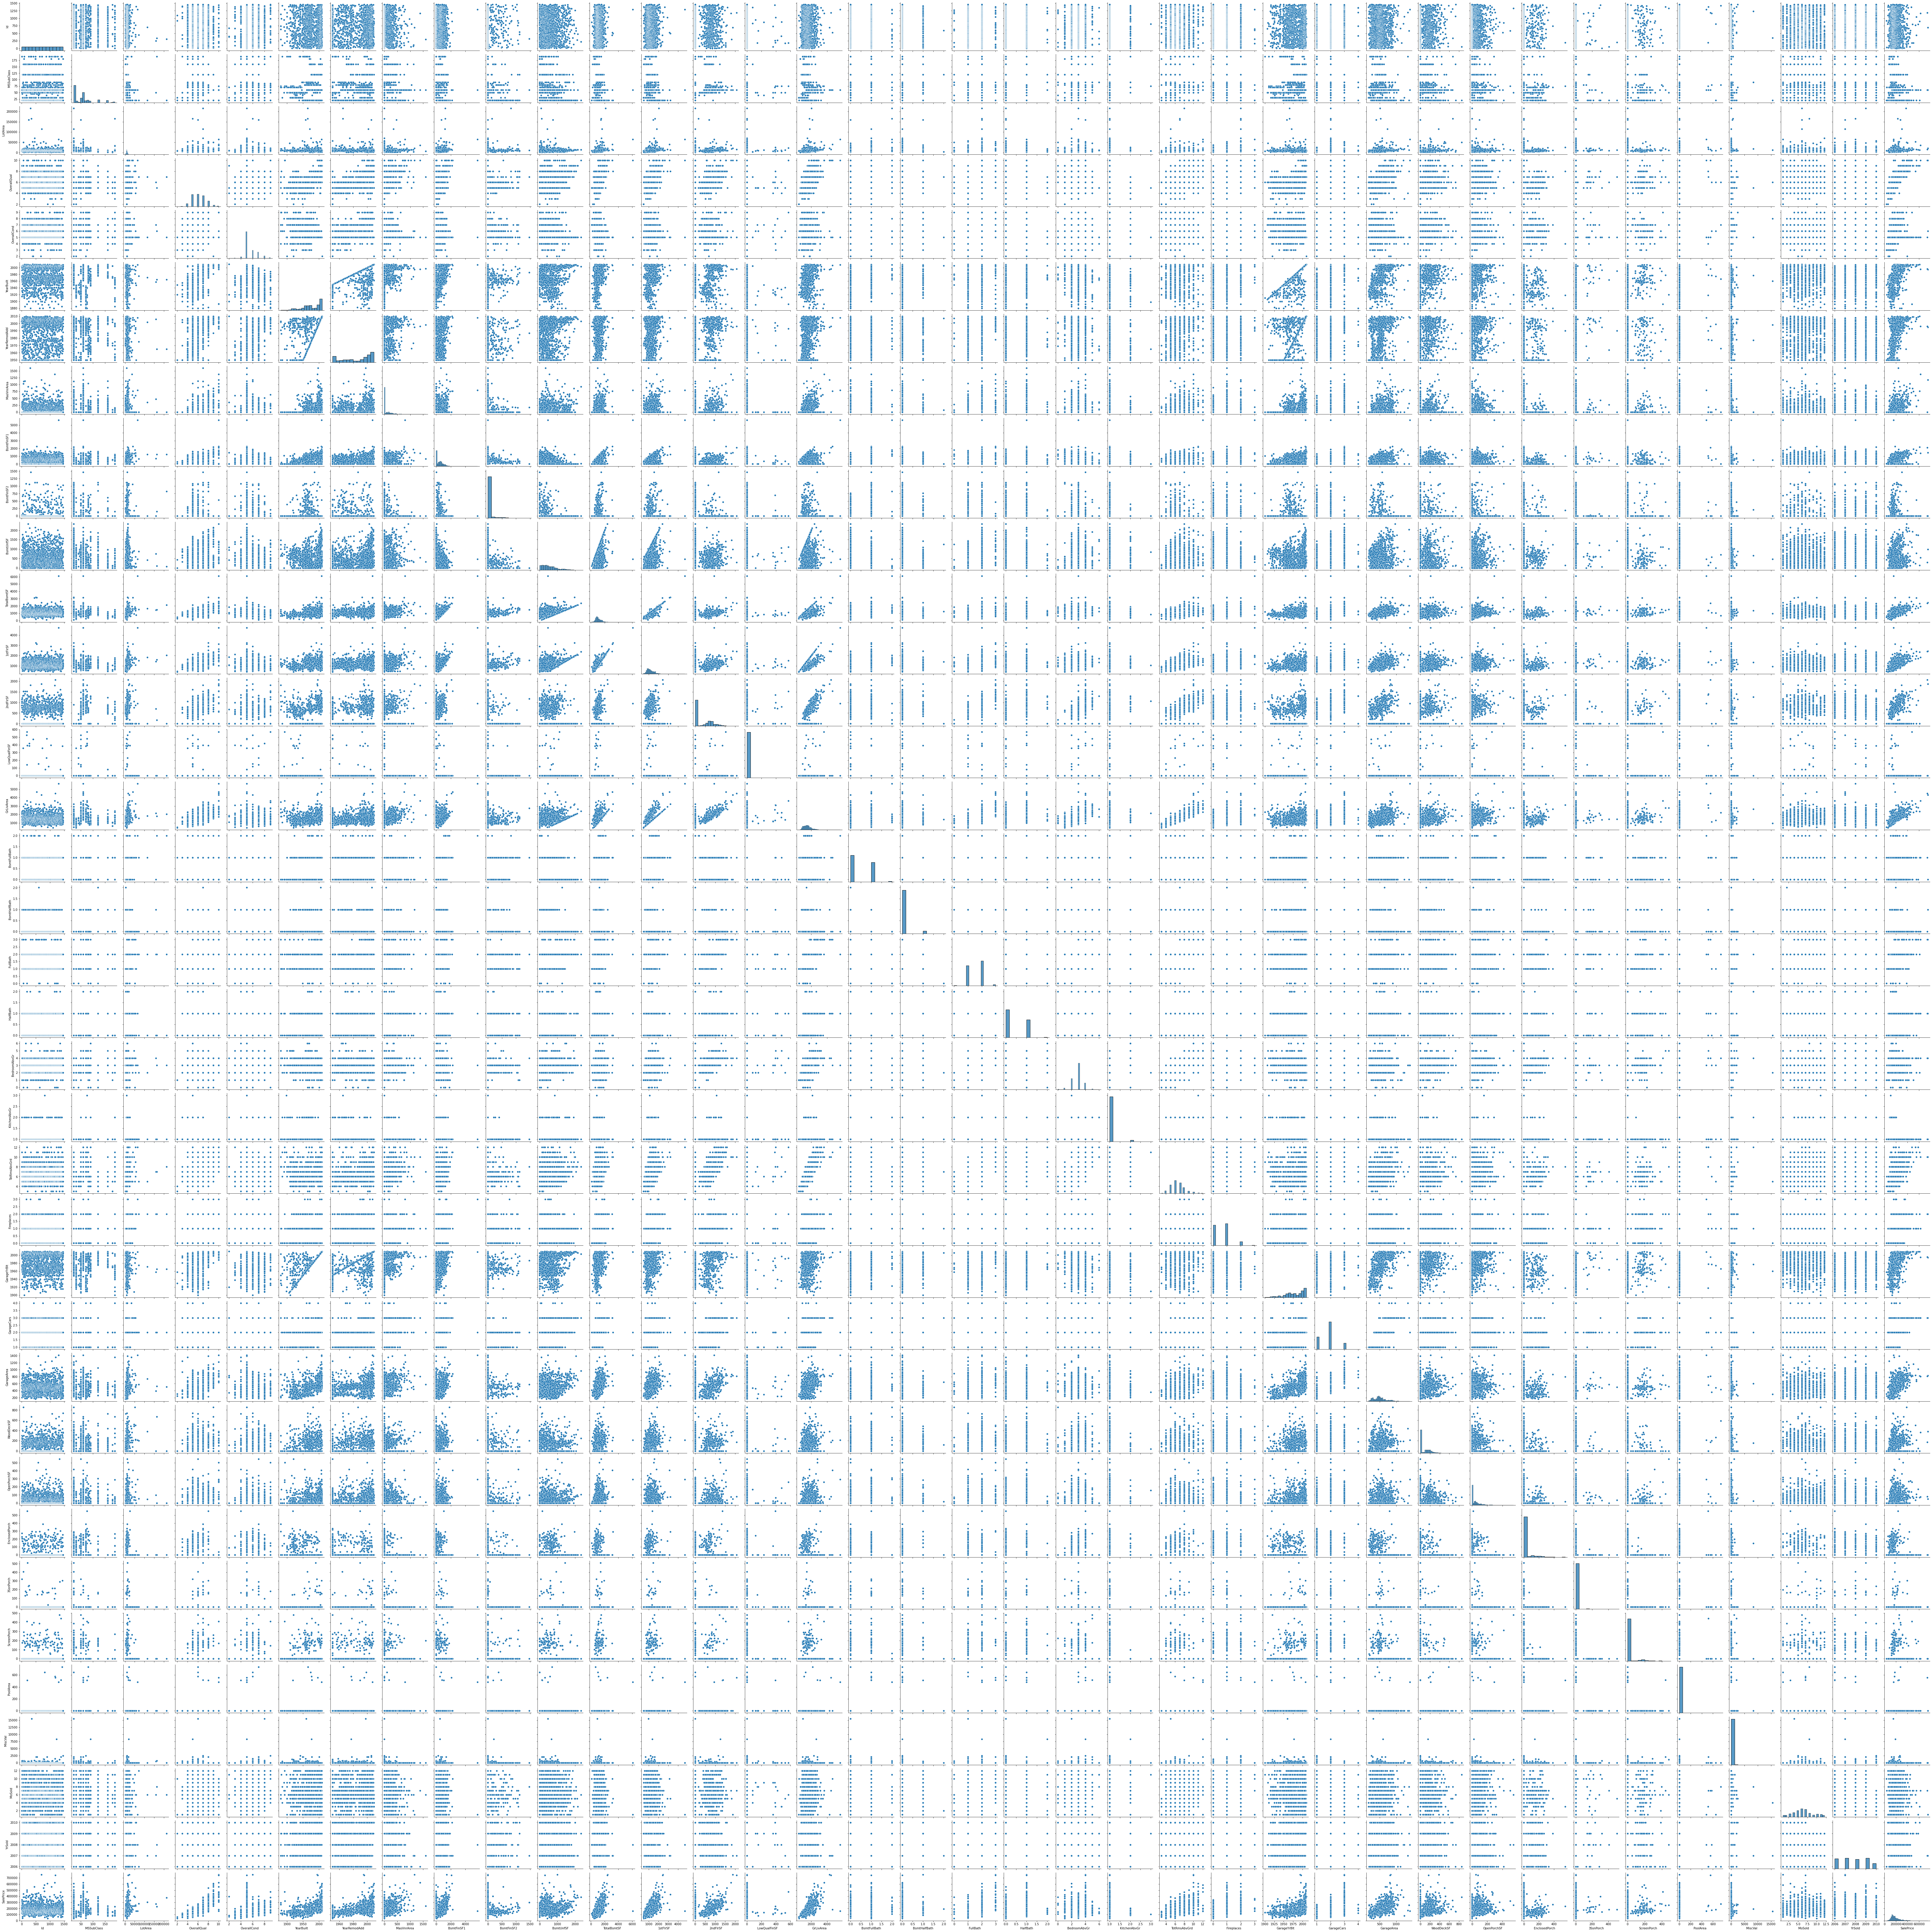

In [57]:
sns.pairplot(newdataset)
plt.show()

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

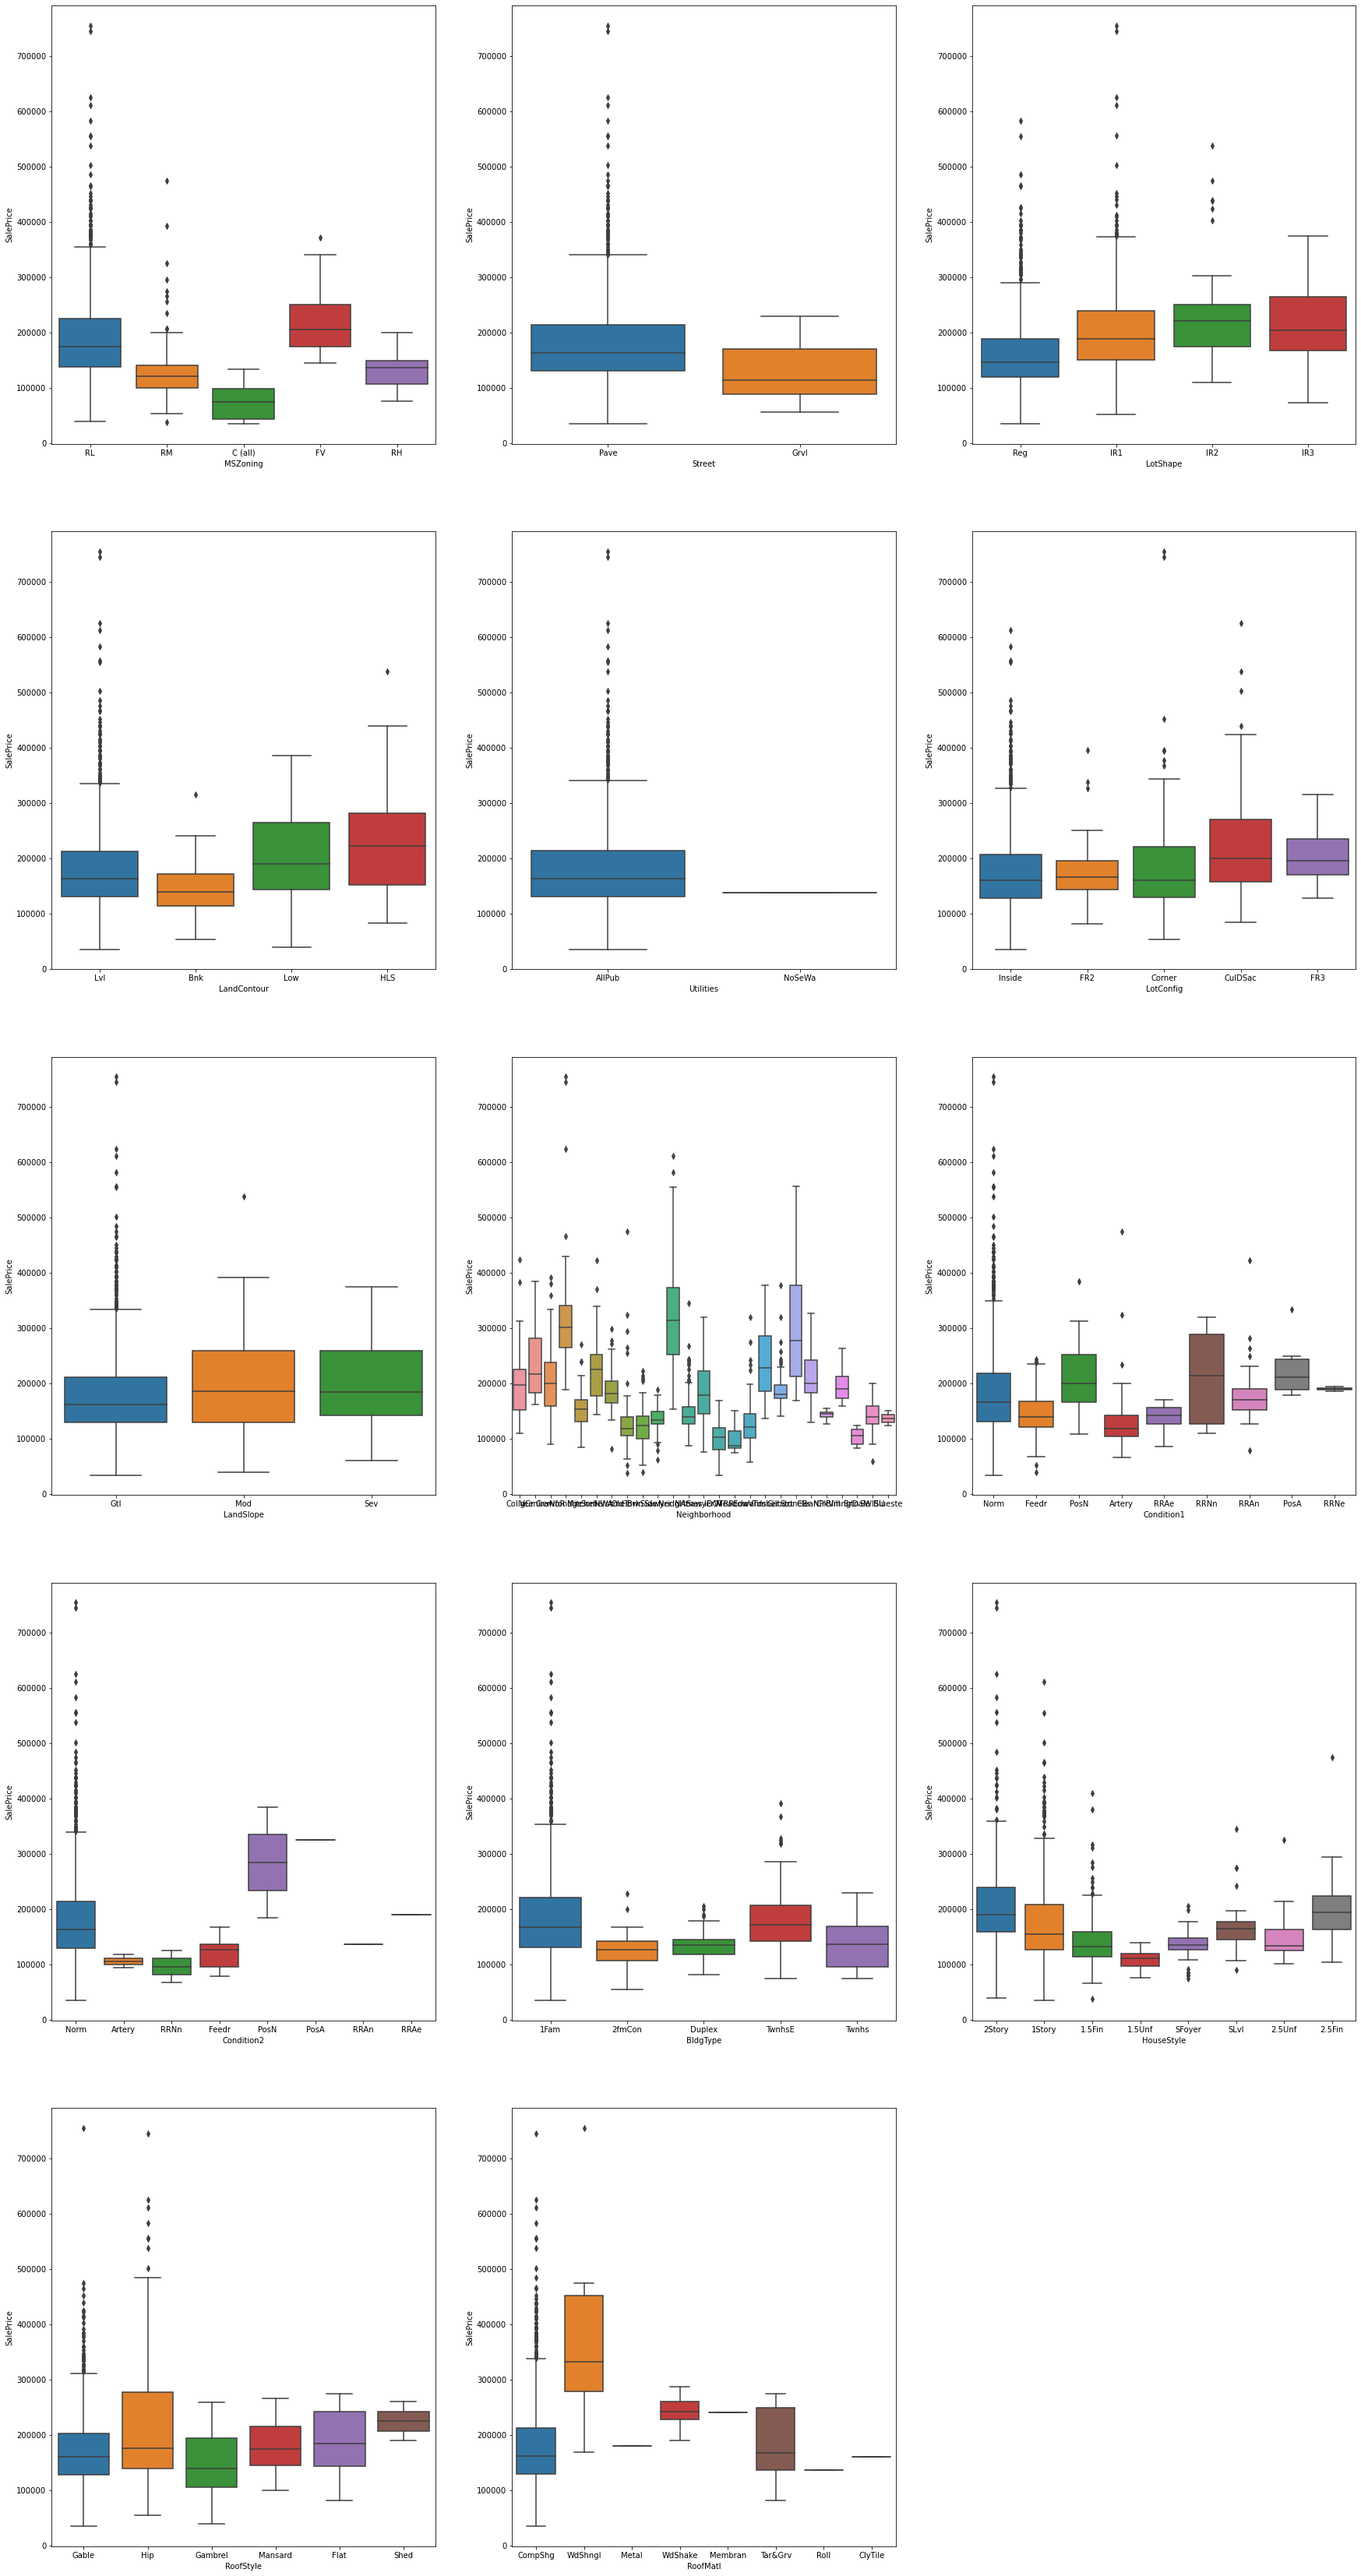

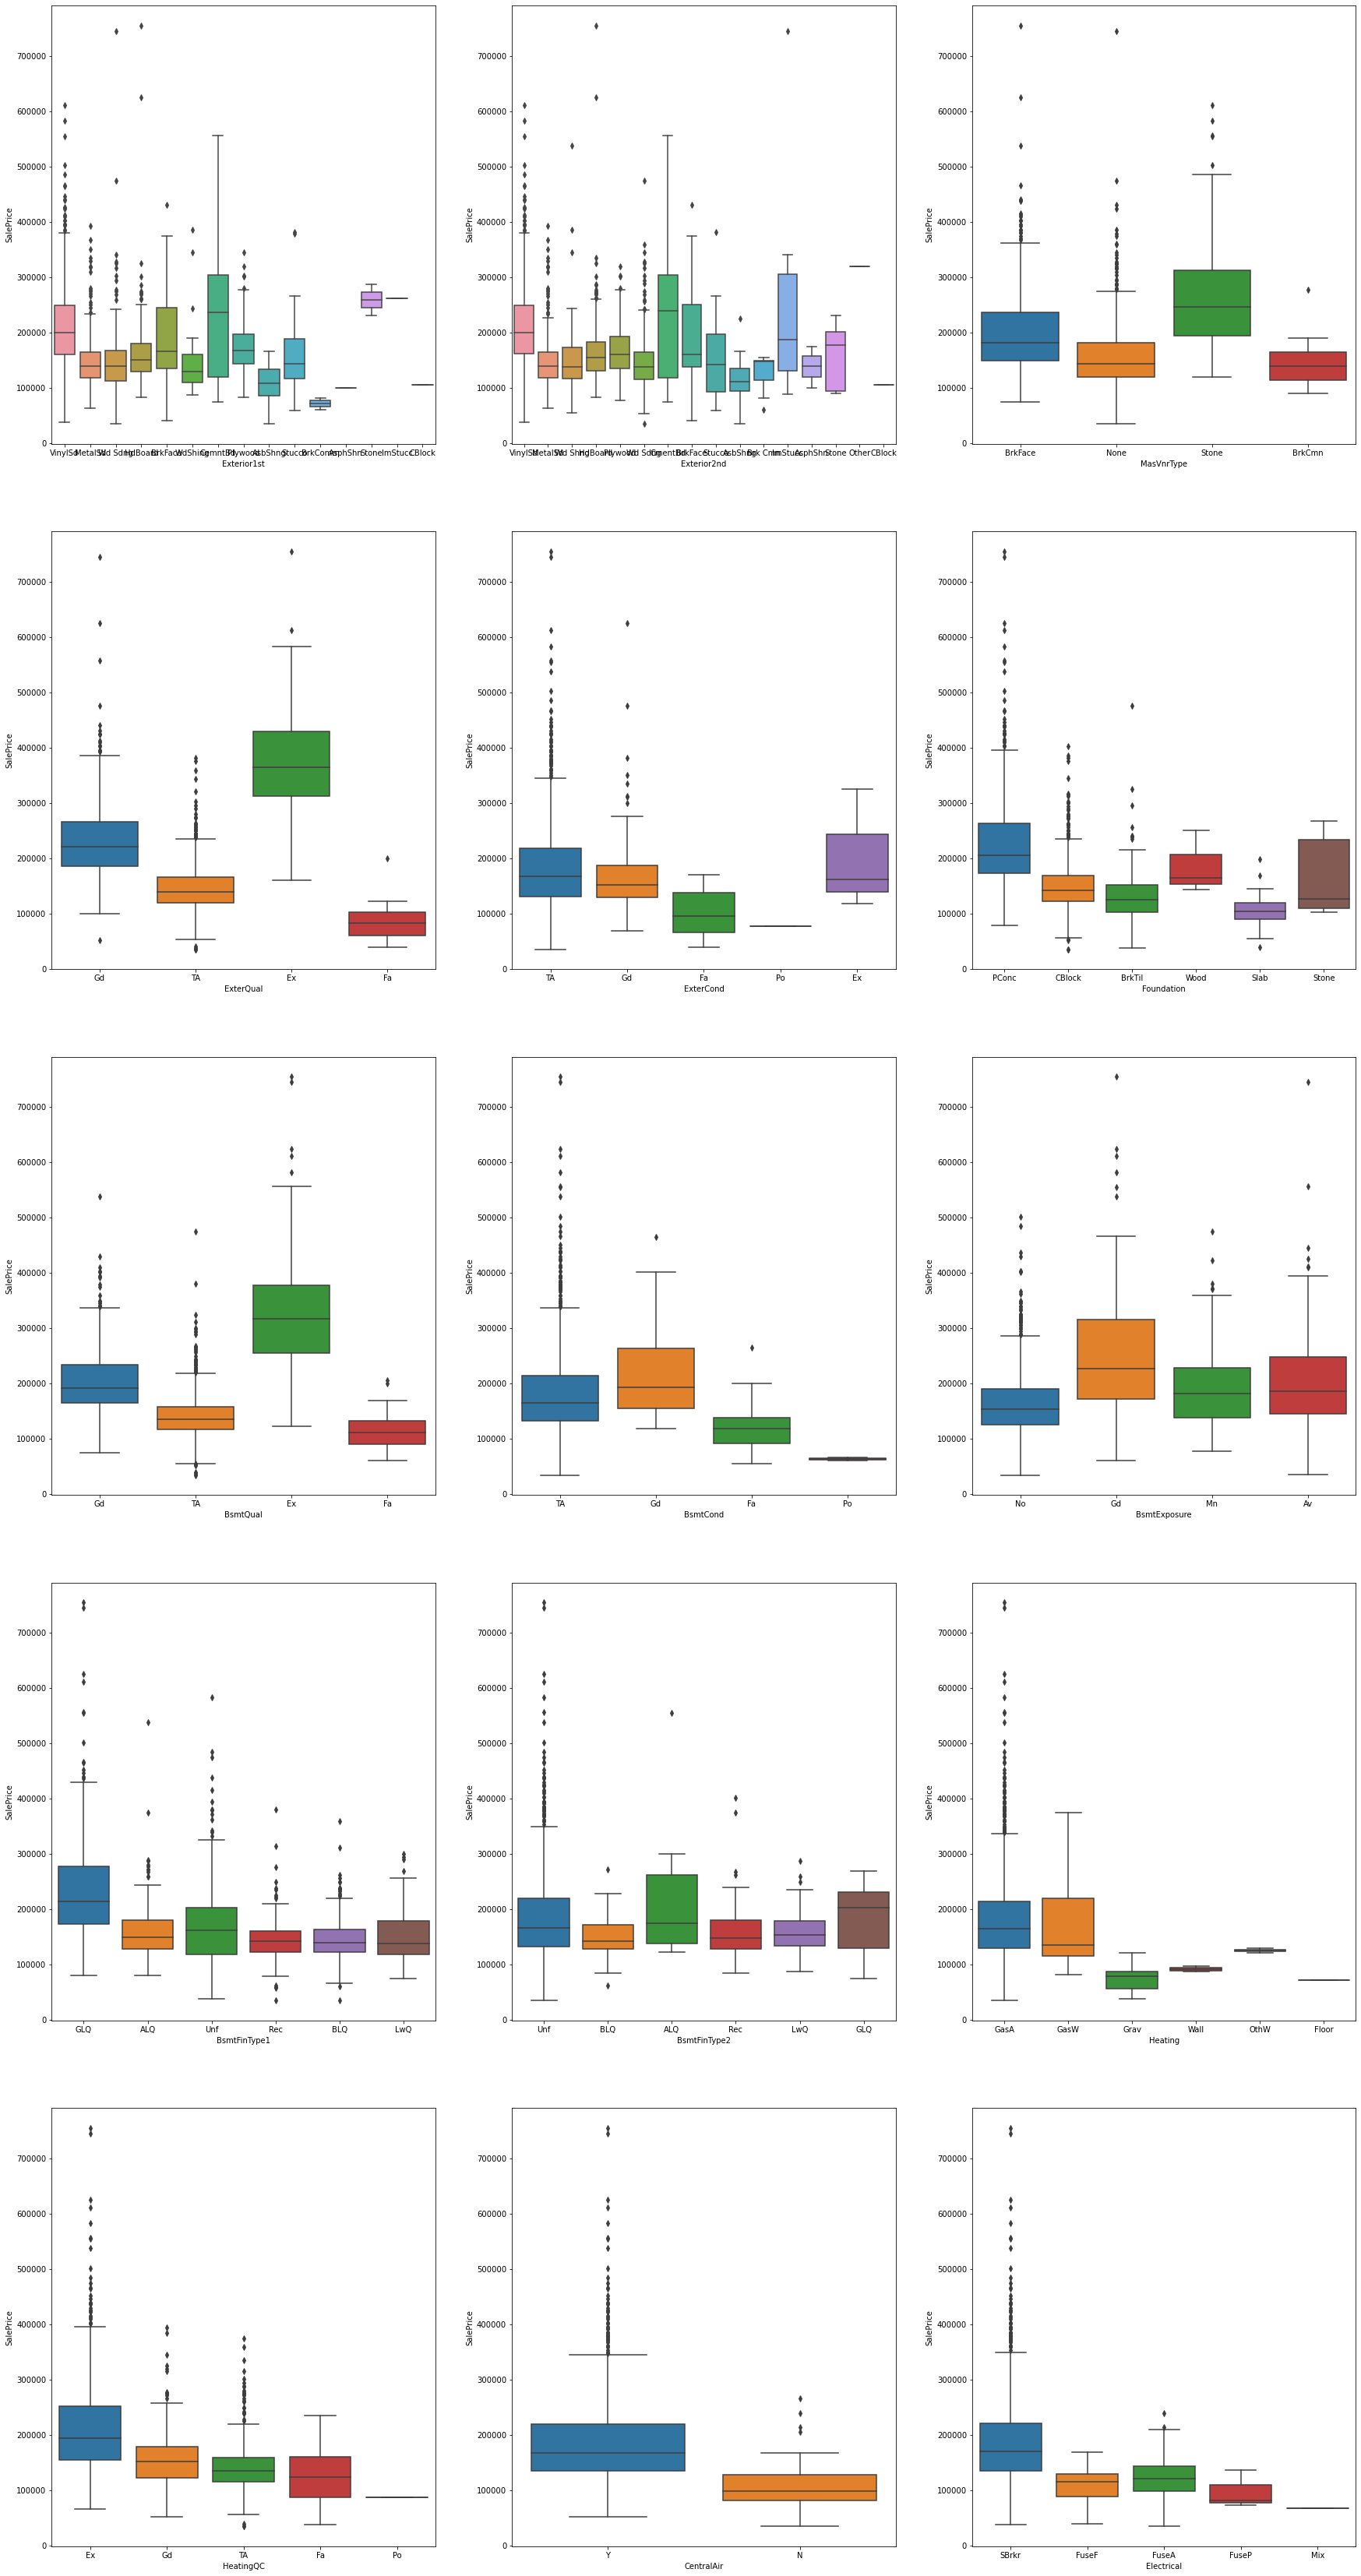

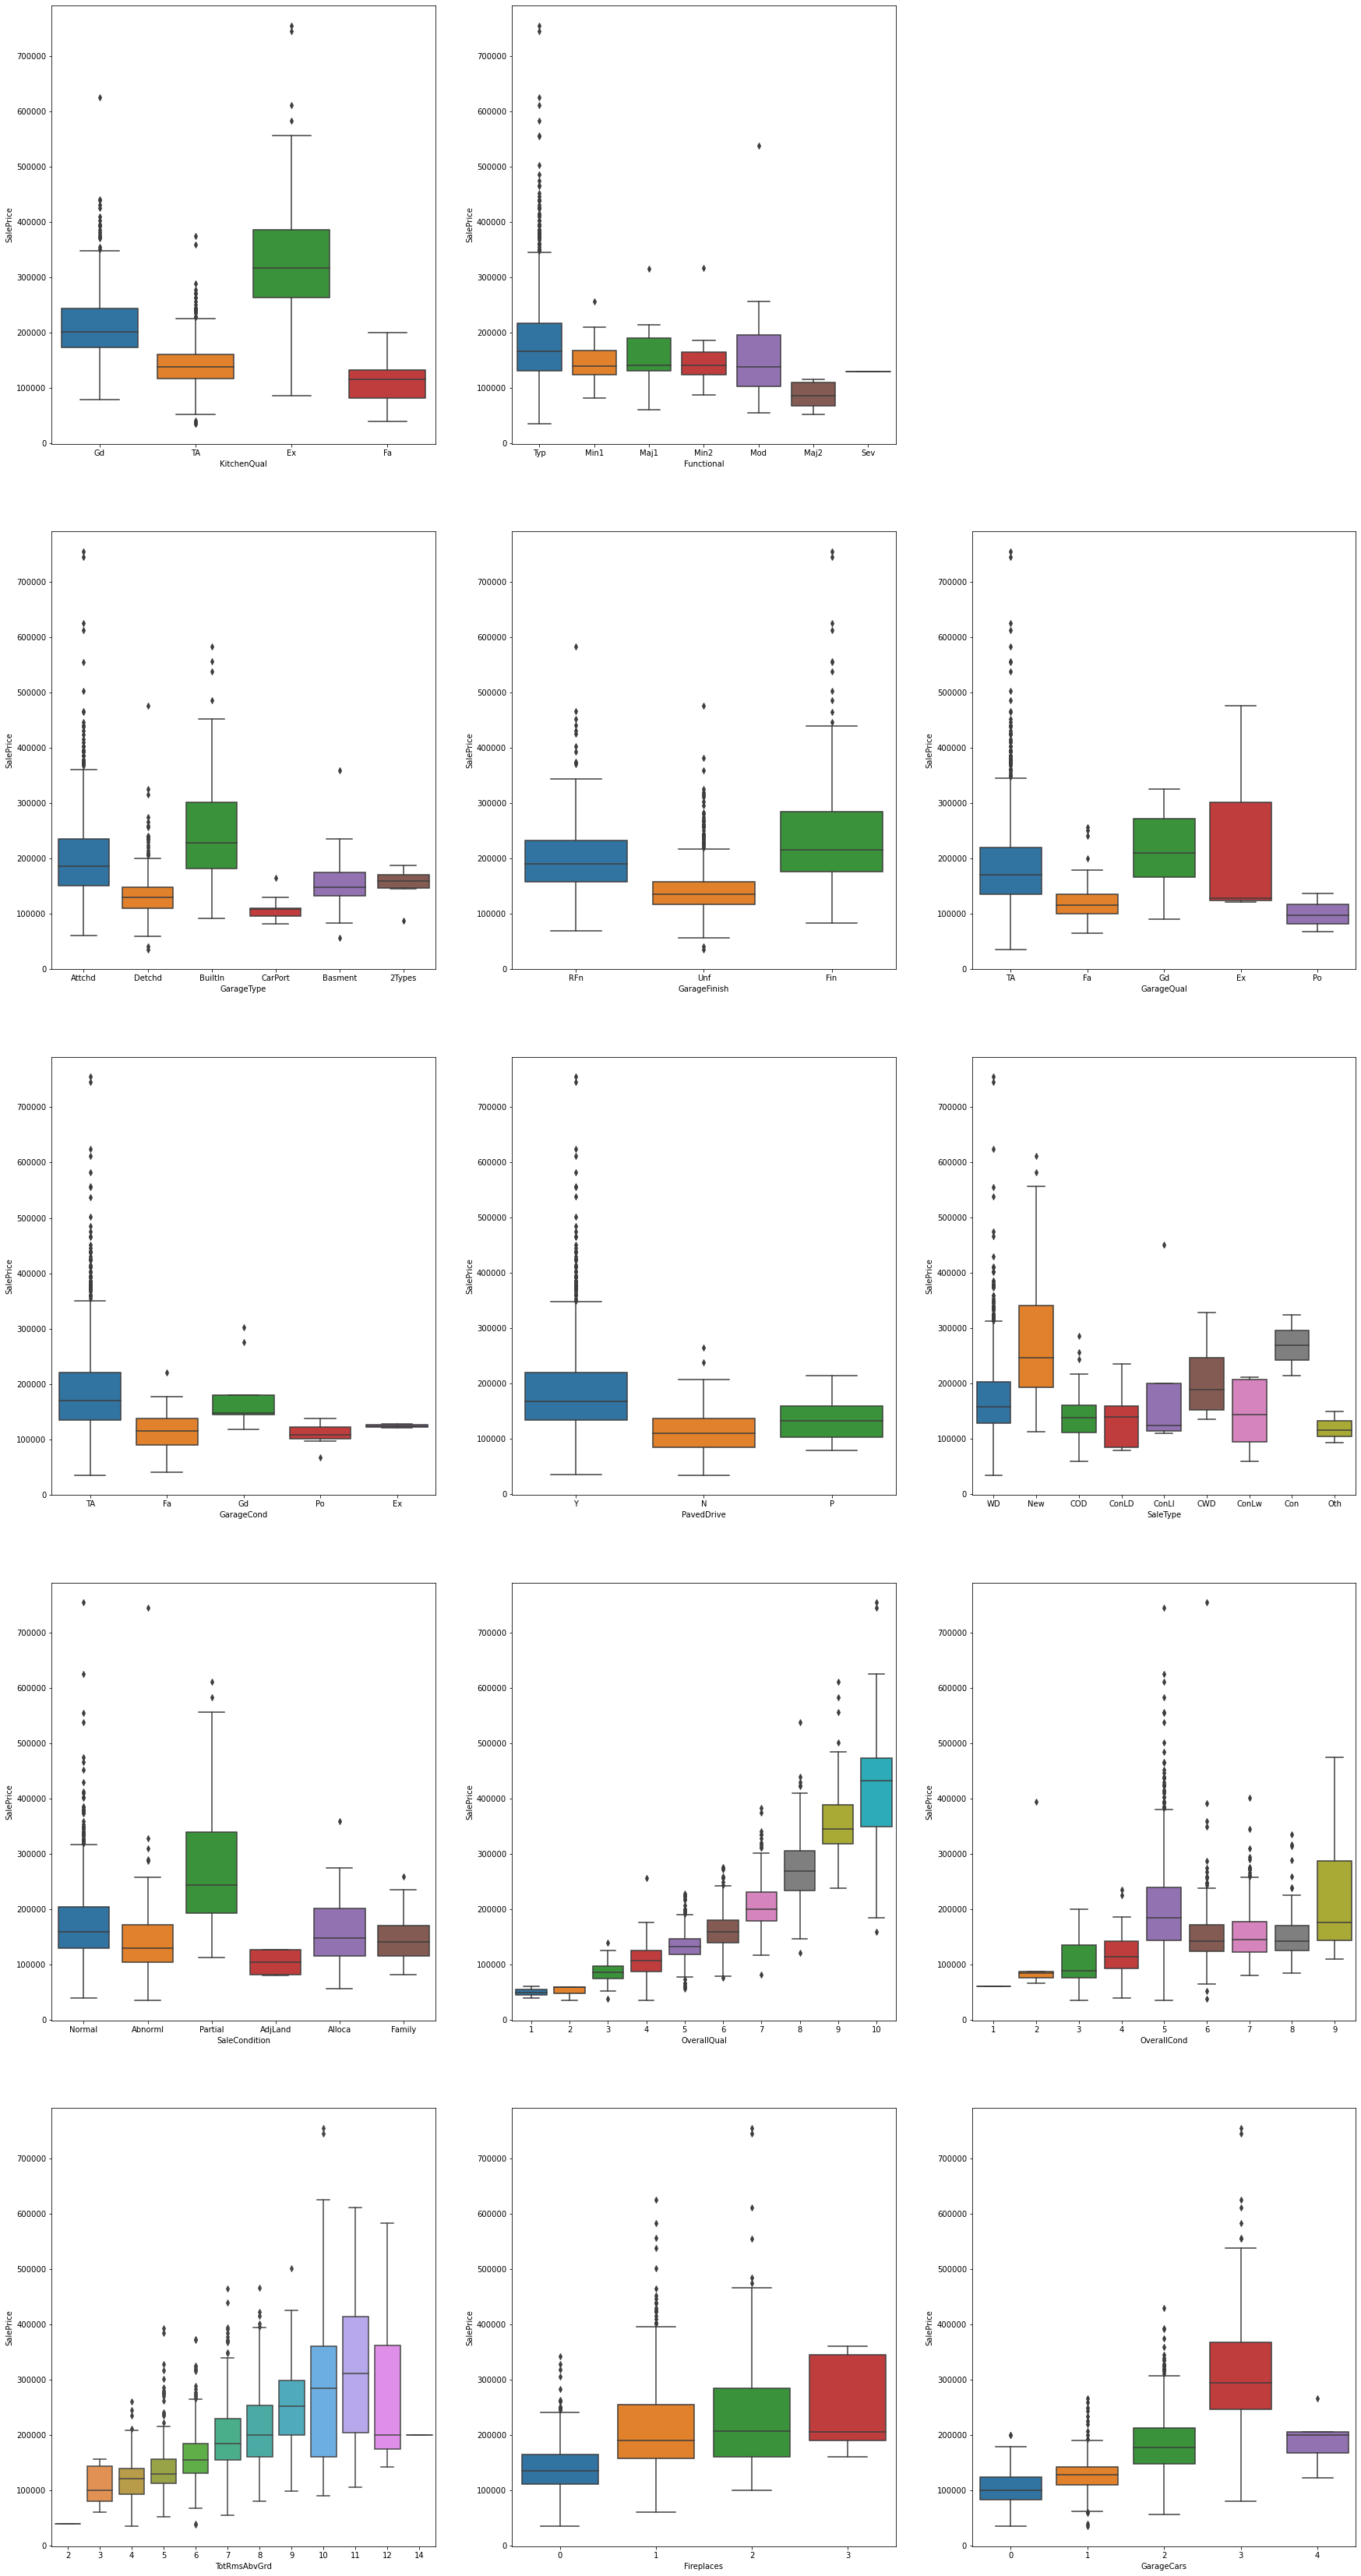

In [101]:
plt.figure(figsize=(30,60))
plt.subplot(5,3,1)
sns.boxplot(x='MSZoning', y='SalePrice', data=dataset)
plt.subplot(5,3,2)
sns.boxplot(x='Street', y='SalePrice', data=dataset)
plt.subplot(5,3,3)
sns.boxplot(x='LotShape', y='SalePrice', data=dataset)
plt.subplot(5,3,4)
sns.boxplot(x='LandContour', y='SalePrice', data=dataset)
plt.subplot(5,3,5)
sns.boxplot(x='Utilities', y='SalePrice', data=dataset)
plt.subplot(5,3,6)
sns.boxplot(x='LotConfig', y='SalePrice', data=dataset)
plt.subplot(5,3,7)
sns.boxplot(x='LandSlope', y='SalePrice', data=dataset)
plt.subplot(5,3,8)
sns.boxplot(x='Neighborhood', y='SalePrice', data=dataset)
plt.subplot(5,3,9)
sns.boxplot(x='Condition1', y='SalePrice', data=dataset)
plt.subplot(5,3,10)
sns.boxplot(x='Condition2', y='SalePrice', data=dataset)
plt.subplot(5,3,11)
sns.boxplot(x='BldgType', y='SalePrice', data=dataset)
plt.subplot(5,3,12)
sns.boxplot(x='HouseStyle', y='SalePrice', data=dataset)
plt.subplot(5,3,13)
sns.boxplot(x='RoofStyle', y='SalePrice', data=dataset)
plt.subplot(5,3,14)
sns.boxplot(x='RoofMatl', y='SalePrice', data=dataset)
plt.figure(figsize=(30,60))
plt.subplot(5,3,1)
sns.boxplot(x='Exterior1st', y='SalePrice', data=dataset)
plt.subplot(5,3,2)
sns.boxplot(x='Exterior2nd', y='SalePrice', data=dataset)
plt.subplot(5,3,3)
sns.boxplot(x='MasVnrType', y='SalePrice', data=dataset)
plt.subplot(5,3,4)
sns.boxplot(x='ExterQual', y='SalePrice', data=dataset)
plt.subplot(5,3,5)
sns.boxplot(x='ExterCond', y='SalePrice', data=dataset)
plt.subplot(5,3,6)
sns.boxplot(x='Foundation', y='SalePrice', data=dataset)
plt.subplot(5,3,7)
sns.boxplot(x='BsmtQual', y='SalePrice', data=dataset)
plt.subplot(5,3,8)
sns.boxplot(x='BsmtCond', y='SalePrice', data=dataset)
plt.subplot(5,3,9)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=dataset)
plt.subplot(5,3,10)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=dataset)
plt.subplot(5,3,11)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=dataset)
plt.subplot(5,3,12)
sns.boxplot(x='Heating', y='SalePrice', data=dataset)
plt.subplot(5,3,13)
sns.boxplot(x='HeatingQC', y='SalePrice', data=dataset)
plt.subplot(5,3,14)
sns.boxplot(x='CentralAir', y='SalePrice', data=dataset)
plt.subplot(5,3,15)
sns.boxplot(x='Electrical', y='SalePrice', data=dataset)
plt.figure(figsize=(30,60))
plt.subplot(5,3,1)
sns.boxplot(x='KitchenQual', y='SalePrice', data=dataset)
plt.subplot(5,3,2)
sns.boxplot(x='Functional', y='SalePrice', data=dataset)
plt.subplot(5,3,4)
sns.boxplot(x='GarageType', y='SalePrice', data=dataset)
plt.subplot(5,3,5)
sns.boxplot(x='GarageFinish', y='SalePrice', data=dataset)
plt.subplot(5,3,6)
sns.boxplot(x='GarageQual', y='SalePrice', data=dataset)
plt.subplot(5,3,7)
sns.boxplot(x='GarageCond', y='SalePrice', data=dataset)
plt.subplot(5,3,8)
sns.boxplot(x='PavedDrive', y='SalePrice', data=dataset)
plt.subplot(5,3,9)
sns.boxplot(x='SaleType', y='SalePrice', data=dataset)
plt.subplot(5,3,10)
sns.boxplot(x='SaleCondition', y='SalePrice', data=dataset)


#Along with the above the below columns are also classified data elements:
#OverallQual
#OverallCond
#TotRmsAbvGrd
#Fireplaces
#GarageCars

plt.subplot(5,3,11)
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset)
plt.subplot(5,3,12)
sns.boxplot(x='OverallCond', y='SalePrice', data=dataset)
plt.subplot(5,3,13)
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=dataset)
plt.subplot(5,3,14)
sns.boxplot(x='Fireplaces', y='SalePrice', data=dataset)
plt.subplot(5,3,15)
sns.boxplot(x='GarageCars', y='SalePrice', data=dataset)


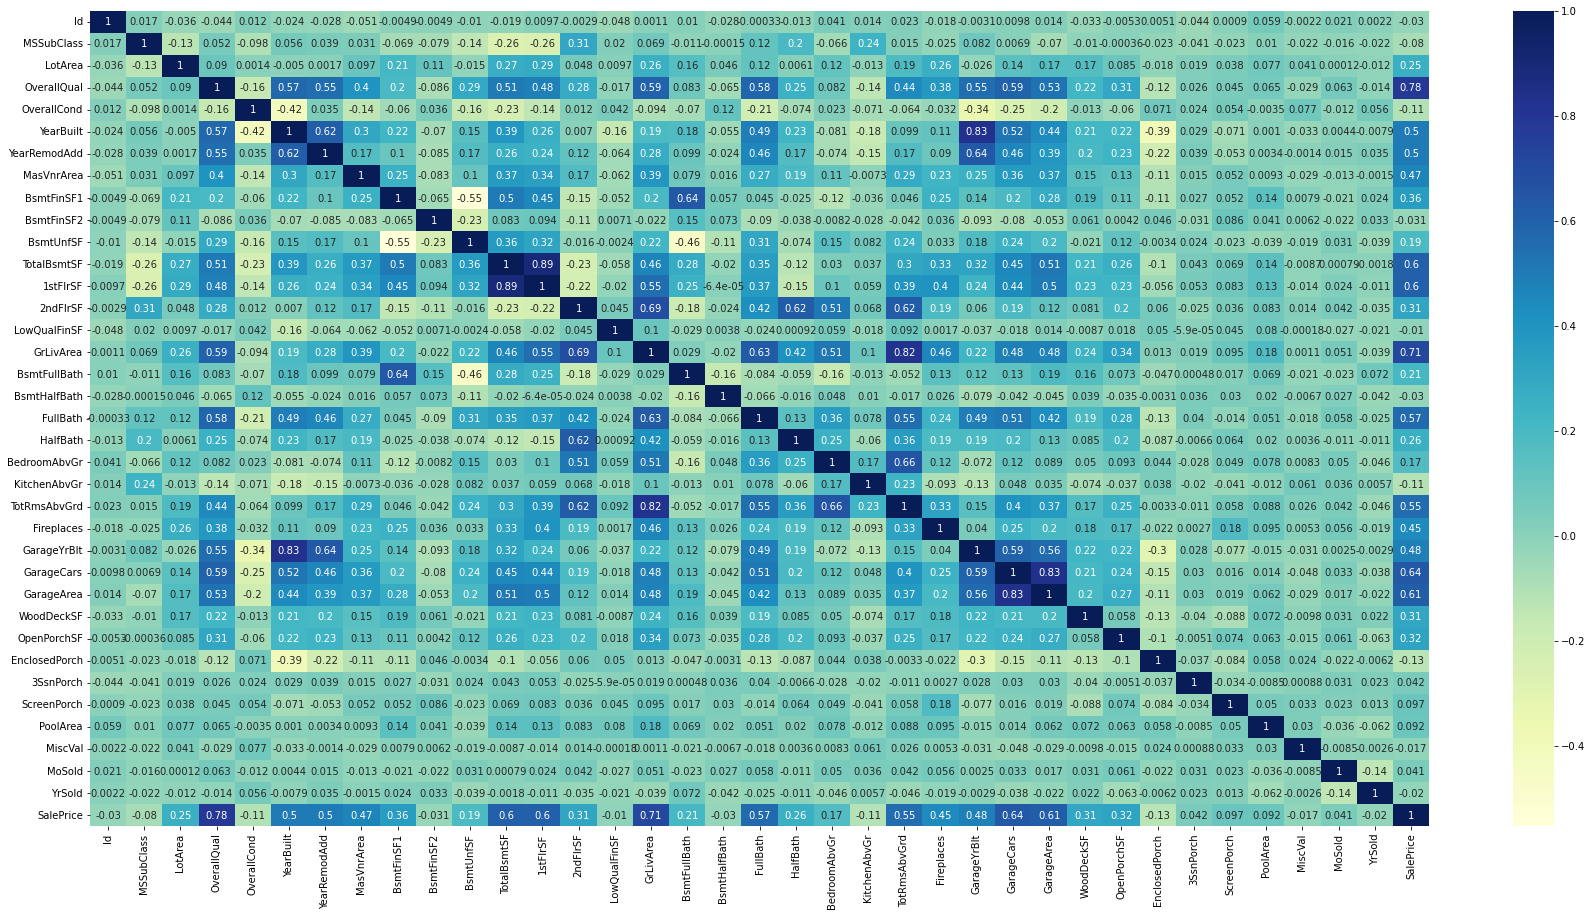

In [83]:
# Correlation with heatmap comparision
plt.figure(figsize=(30,15))
sns.heatmap(newdataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Data Creation for Model

### Creating Dummy Variables in order to convert all catogorical variables

In [109]:
dataset3 = pd.get_dummies(newdataset, drop_first=True)


In [110]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 228 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(35), uint8(191)
memory usage: 679.1 KB


In [127]:
dataset3.drop('Id', axis=1, inplace=True)

# Splitting the date into Train and Test data

In [385]:
df_train, df_test = train_test_split(dataset3, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(936, 227)
(402, 227)


# Re-scaling of train dataset
### Re-scaling the dataset is important because, the coefficients of two independent variables might differ hugely once we train the model
There are two techniques:
Min-Max scaling - also called as normalization - entire data gets compressed between 0 and 1 - formula: (x-xmin)/(xmax-xmin)
Standardization - mean is 0 and sigma(stdev) is 1 - formula: (x-mean)/sigma

In [386]:
# 1. Instantiate an Object

scaler = MinMaxScaler()

# create the list of variables that need to undergo scaling: should be the entire train data
scalerlist = list(df_train.columns.values)

# 2. Fit on the data
# three parts to this: fit-learns the xmin, and xmax, transform-does the transformation, fit_transform-does the replacement. here we will use fit-transform directly
df_train[scalerlist] = scaler.fit_transform(df_train[scalerlist])

In [387]:
df_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1059    0.176471  0.063253        0.500     0.714286   0.393701      0.000000   
571     0.000000  0.038250        0.500     0.571429   0.606299      0.150000   
173     0.000000  0.056417        0.500     0.428571   0.622047      0.183333   
732     0.235294  0.064071        0.625     0.428571   0.913386      0.816667   
1282    0.000000  0.047559        0.375     0.714286   0.748031      0.966667   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
1059    0.300000    0.131416    0.377883   0.000000  ...             0.0   
571     0.129375    0.183186    0.000000   0.192637  ...             0.0   
173     0.306875    0.127434    0.253731   0.299658  ...             0.0   
732     0.126250    0.111504    0.000000   0.385702  ...             0.0   
1282    0.000000    0.235398    0.097693   0.155822  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1059             0.0           0.0           0.0          1.0   
571              0.0           0.0           0.0          1.0   
173              0.0           0.0           0.0          0.0   
732              0.0           0.0           0.0          1.0   
1282             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1059                    0.0                   0.0                   0.0   
571                     0.0                   0.0                   0.0   
173                     0.0                   0.0                   0.0   
732                     0.0                   0.0                   0.0   
1282                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1059                   1.0                    0.0  
571                    0.0                    0.0  
173                    1.0                    0.0  
732                    1.0                    0.0  
1282                   1.0                    0.0  

[5 rows x 227 columns]

### Creating x and y variables out of df_train

In [388]:
y_train = df_train.pop('SalePrice')
x_train = df_train

In [389]:
x_train.shape


(936, 226)

# Building the Linear Regression model

In [390]:
#Instantiating the Linear Regression Object
reg = LinearRegression()

In [391]:
# Fitting our train data into the object
reg.fit(x_train, y_train)

LinearRegression()

In [392]:
# Getting the predictions of Y variables
y_train_pred = reg.predict(x_train)

In [393]:
# Comparing the actuals v/s predictions with the help of r2
r2_score(y_train, y_train_pred)

0.9315513222688266

In [394]:
print(reg.intercept_)
print(reg.coef_)

-11803177066.787598
[-2.23559436e-02  1.18530900e-01  6.93000024e-02  6.27636016e-02
  7.12170156e-02  4.60943828e-03  4.93742799e-02 -2.46583043e+10
 -1.60824516e+10 -2.54875216e+10  3.37687840e+10 -9.45028344e+09
 -7.10146845e+09 -1.96708957e+09  1.44299088e+10 -1.95913017e-03
  9.09566879e-05  5.74493408e-03  5.88417053e-04 -4.53100204e-02
 -2.98192501e-02  2.90105343e-02  7.46512413e-03 -2.73529291e-02
  1.03223324e-03  5.83958626e-02  8.32842290e-03 -1.45435333e-05
  9.15896893e-03  1.26290917e-02  6.01220131e-03  9.66321230e-02
 -3.91459465e-03 -1.90639496e-03 -2.88963318e-04  5.90412617e-02
  4.78297472e-02  5.05166054e-02  4.33154106e-02  5.01510501e-02
  3.23379040e-03  7.66499341e-03  7.53641129e-04  1.77540779e-02
 -1.62490606e-02  1.41792297e-02 -5.79324365e-02  9.16719437e-03
 -1.58430338e-02 -5.39159775e-03 -4.53805923e-03  4.35769558e-04
 -4.38678265e-02  2.73127481e-03  7.81482458e-03  5.30934334e-03
  1.22070312e-03 -5.42974472e-03  2.39895582e-02 -2.07555294e-02
 -4.4

In [395]:
#Metrics to give an overall sense of the model
rss = np.sum(np.square(y_train-y_train_pred))
print(rss)

mse = mean_squared_error(y_train, y_train_pred)
print(mse)

rmse = mse**0.5
print(rmse)

0.7666238845048444
0.0008190426116504748
0.028618920518609273


# Residual Analysis

### Check for non-linearity in Data
     Conditions needed to meet the linearity in data:
       1. The residuals are scattered randomly around 0
       2. The spread of residuals remains constant.
       3. There are no extreme points

In [396]:
y_train_res = y_train - y_train_pred

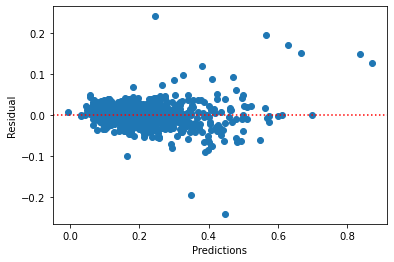

In [397]:
df_train['res'] = y_train_res
plt.scatter(y_train_pred, df_train['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

In [398]:
df_train.drop('res',  axis=1, inplace=True)

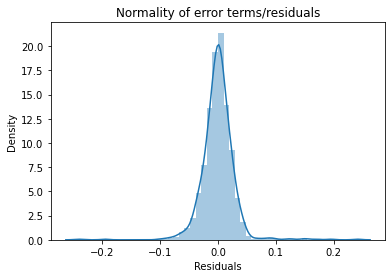

In [399]:
p = sns.distplot(y_train_res, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()

### We can see that all conditions of linearity are met, and also the distplot shows normal plot - and therefore we will not do any data transformation, or polynomial regression or non-linear regression

### Creating x and y variables out of df_test

In [400]:
df_test_backup = df_test

In [401]:
df_test.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
12           20    12968            5            6       1962          1962   
335         190   164660            5            6       1965          1965   
348         160     2448            7            5       2003          2004   
885         120     5119            9            5       1999          2000   
175          20    12615            6            7       1950          2001   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
12          0.0         737           0        175  ...               0   
335         0.0        1249         147        103  ...               0   
348       106.0         573           0        191  ...               0   
885        60.0        1238           0        460  ...               0   
175         0.0         477           0        725  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
12                0             0             0            1   
335               0             0             0            1   
348               0             0             0            1   
885               0             0             0            0   
175               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
12                       0                     0                     0   
335                      0                     0                     0   
348                      0                     0                     0   
885                      0                     0                     0   
175                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
12                      1                      0  
335                     1                      0  
348                     1                      0  
885                     0                      0  
175                     1                      0  

[5 rows x 227 columns]

### Scaling of Test Data (Only Transform)

In [402]:


# create the list of variables that need to undergo scaling:
scalerlist2=list(df_test.columns.values)

# 2. Fit on the data
# three parts to this: fit-learns the xmin, and xmax, transform-does the transformation, fit_transform-does the replacement. here we will use transform directly
df_test[scalerlist] = scaler.transform(df_test[scalerlist])

In [403]:
df_test.describe()

MSSubClass     LotArea  OverallQual  OverallCond   YearBuilt  \
count  402.000000  402.000000   402.000000   402.000000  402.000000   
mean     0.220296    0.063808     0.532649     0.519545    0.713069   
std      0.241307    0.094744     0.168837     0.157428    0.242938   
min      0.000000    0.002410     0.000000     0.000000   -0.015748   
25%      0.000000    0.039824     0.375000     0.428571    0.582677   
50%      0.235294    0.052143     0.500000     0.428571    0.740157   
75%      0.294118    0.068375     0.625000     0.571429    0.944882   
max      1.000000    1.356658     1.000000     1.000000    1.007874   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    402.000000  402.000000  402.000000  402.000000  402.000000  ...   
mean       0.586401    0.069916    0.211793    0.032610    0.254124  ...   
std        0.341088    0.116173    0.225595    0.108859    0.196136  ...   
min        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%        0.283333    0.000000    0.000000    0.000000    0.097389  ...   
50%        0.733333    0.000000    0.190044    0.000000    0.205693  ...   
75%        0.895833    0.108750    0.329757    0.000000    0.362586  ...   
max        1.000000    0.705625    2.497345    0.736092    0.875856  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      402.000000           402.0    402.000000         402.0   
mean         0.004975             0.0      0.084577           0.0   
std          0.070447             0.0      0.278598           0.0   
min          0.000000             0.0      0.000000           0.0   
25%          0.000000             0.0      0.000000           0.0   
50%          0.000000             0.0      0.000000           0.0   
75%          0.000000             0.0      0.000000           0.0   
max          1.000000             0.0      1.000000           0.0   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   402.000000             402.000000            402.000000   
mean      0.858209               0.002488              0.007463   
std       0.349270               0.049875              0.086171   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            402.000000            402.000000             402.000000  
mean               0.014925              0.810945               0.087065  
std                0.121405              0.392040               0.282281  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 227 columns]

In [404]:
y_test = df_test.pop('SalePrice')
x_test = df_test

In [405]:
y_test_pred = reg.predict(x_test)


# LR Model Evaluation

In [450]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9315513222688266
-6.172272301948342e+19
0.7666238845048444
2.9949298458160156e+20
0.0008190426116504748
7.450074243323421e+17


# Ridge Regression

In [407]:
# list of alphas to tune - if the value is too high it will lead to undercutting, if the value is too low it will lead to overfitting. 
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [408]:
print(model_cv.best_params_)

{'alpha': 5}


#### Fitting the ridge regression with optimum alpha/lamda on the training set again

In [530]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
print(ridge.coef_)

[-2.11501930e-02  2.02793416e-02  6.68224470e-02  3.80647967e-02
  1.98072967e-02  1.22496665e-02  3.57633260e-02  5.58160298e-02
  8.02819482e-03  1.05742471e-02  5.25619476e-02  5.87125330e-02
  7.58044848e-02  8.62032455e-03  7.69325852e-02  9.55768325e-03
 -2.66807117e-03  2.64120998e-02  9.85817270e-03 -1.93641045e-03
 -1.92178232e-02  4.54525359e-02  2.25015287e-02 -5.82093656e-03
  1.97793269e-02  3.79646773e-02  1.82525586e-02  3.76241654e-03
  5.62900899e-03  1.01245599e-02  1.47628305e-02  3.74249605e-02
  1.21675618e-03 -3.78982570e-03 -6.12884999e-04  1.15340107e-02
  3.07565298e-03  8.50732817e-03  1.42676793e-03  1.12970514e-02
  1.24929531e-02  8.36196342e-03 -2.70648639e-03  1.94707654e-02
 -3.89620071e-03  1.45751570e-02 -6.30585900e-03  1.01212582e-02
 -1.31602861e-02 -3.17483218e-03 -4.24780175e-03  4.45514542e-03
 -9.23545669e-03 -9.82853548e-04 -3.08995335e-04  5.82229617e-03
 -8.54571154e-04 -7.14127928e-03  2.14108454e-02 -2.08677503e-02
 -1.24661197e-02 -7.39881

In [533]:
y_train_predr = ridge.predict(x_train)

In [534]:
y_test_predr = ridge.predict(x_test)

# Ridge REgression Model Evaluation

In [535]:
metric2 = []
r2_train_lrr = r2_score(y_train, y_train_predr)
print(r2_train_lrr)
metric2.append(r2_train_lrr)

r2_test_lrr = r2_score(y_test, y_test_predr)
print(r2_test_lrr)
metric2.append(r2_test_lrr)

rss1_lrr = np.sum(np.square(y_train - y_train_predr))
print(rss1_lrr)
metric2.append(rss1_lrr)

rss2_lrr = np.sum(np.square(y_test - y_test_predr))
print(rss2_lrr)
metric2.append(rss2_lrr)

mse_train_lrr = mean_squared_error(y_train, y_train_predr)
print(mse_train_lrr)
metric2.append(mse_train_lrr**0.5)

mse_test_lrr = mean_squared_error(y_test, y_test_predr)
print(mse_test_lrr)
metric2.append(mse_test_lrr**0.5)

0.9113138764249784
0.7763944787866702
0.9932828918007833
1.0849859118491179
0.0010611996707273327
0.00269896992997293


# Lasso Regression

In [537]:
# list of alphas to tune - if the value is too high it will lead to undercutting, if the value is too low it will lead to overfitting. 
params = {'alpha': [0.000001,0.00001,0.0002,0.0003, 0.0004, 0.0005, 0.0006,0.0001,0.001,0.002, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
lasso = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0001, 0.001, 0.002, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2, 3, 4, 5, 6, 7, 8, 9, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [539]:
print(model_cv.best_params_)

{'alpha': 0.0002}


In [541]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0002)

In [543]:
lasso.coef_

array([-0.02960619,  0.        ,  0.09676393,  0.04234918,  0.02818263,
        0.01071692,  0.02719341,  0.05442374,  0.        , -0.        ,
        0.06796419,  0.        ,  0.03608986, -0.        ,  0.27998648,
        0.00422755, -0.        ,  0.        , -0.        , -0.        ,
       -0.00537779,  0.00926849,  0.01680956,  0.        ,  0.00615914,
        0.04806956,  0.00609563,  0.        , -0.        ,  0.        ,
        0.0086342 ,  0.03262994, -0.        , -0.00043569,  0.        ,
        0.        , -0.        ,  0.00231542, -0.00399745,  0.        ,
        0.00881597,  0.        , -0.00159049,  0.01040276,  0.        ,
        0.00826104, -0.        ,  0.00998104, -0.00452029, -0.        ,
       -0.00278123,  0.        , -0.        , -0.        ,  0.        ,
        0.00314334,  0.        , -0.        ,  0.02344017, -0.01064383,
        0.        , -0.        , -0.        , -0.00284037, -0.01102532,
        0.        , -0.00443628,  0.05167797,  0.03942267, -0.00

In [545]:
y_train_predlasso = lasso.predict(x_train)

In [546]:
y_test_predlasso = lasso.predict(x_test)

# Lasso Regression Model Evaluation

In [550]:
metric3 = []
r2_train_lrlasso = r2_score(y_train, y_train_predlasso)
print(r2_train_lrlasso)
metric3.append(r2_train_lrlasso)

r2_test_lrlasso = r2_score(y_test, y_test_predlasso)
print(r2_test_lrlasso)
metric3.append(r2_test_lrlasso)

rss1_lrlasso = np.sum(np.square(y_train - y_train_predlasso))
print(rss1_lrlasso)
metric3.append(rss1_lrlasso)

rss2_lrlasso = np.sum(np.square(y_test - y_test_predlasso))
print(rss2_lrlasso)
metric3.append(rss2_lrlasso)

mse_train_lrlasso = mean_squared_error(y_train, y_train_predlasso)
print(mse_train_lrlasso)
metric3.append(mse_train_lrlasso**0.5)

mse_test_lrlasso = mean_squared_error(y_test, y_test_predlasso)
print(mse_test_lrlasso)
metric3.append(mse_test_lrlasso**0.5)

0.9095511412024315
0.759954884702575
1.0130254926581683
1.164754639745351
0.0010822921930108637
0.0028973996013565945


# Comparision of All three Models

In [554]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'Rss (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)']}
lr_table2 = pd.DataFrame(lr_table, columns = ['Metric'])
lr_metric = pd.Series(metric, name= 'Linear Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_table2,lr_metric, rg_metric, ls_metric], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.315513e-01          0.911314          0.909551
1   R2 Score (Test)      -6.172272e+19          0.776394          0.759955
2       Rss (Train)       7.666239e-01          0.993283          1.013025
3        RSS (Test)       2.994930e+20          1.084986          1.164755
4       MSE (Train)       2.861892e-02          0.032576          0.032898
5        MSE (Test)       8.631381e+08          0.051952          0.053827

# Changes in coefficients after regularization

In [571]:
betas = pd.DataFrame(index=x_train.columns)

In [572]:
betas.rows = x_train.columns

In [573]:
betas['Linear'] = reg.coef_

In [574]:
betas['Ridge'] = ridge.coef_

In [575]:
betas['Lasso'] =lasso.coef_

In [584]:
pd.set_option('display.max_rows', None)
betas.head(230).sort_values(["Ridge"], ascending=False)

Linear     Ridge     Lasso
GrLivArea              1.442991e+10  0.076933  0.279986
2ndFlrSF              -7.101468e+09  0.075804  0.036090
OverallQual            6.930000e-02  0.066822  0.096764
1stFlrSF              -9.450283e+09  0.058713  0.000000
BsmtFinSF1            -2.465830e+10  0.055816  0.054424
TotalBsmtSF            3.376878e+10  0.052562  0.067964
Neighborhood_NoRidge   4.178734e-02  0.052054  0.051678
RoofMatl_WdShngl      -2.635424e+09  0.048221  0.070606
TotRmsAbvGrd           2.901053e-02  0.045453  0.009268
OverallCond            6.276360e-02  0.038065  0.042349
GarageArea             5.839586e-02  0.037965  0.048070
PoolArea               9.663212e-02  0.037425  0.032630
MasVnrArea             4.937428e-02  0.035763  0.027193
Neighborhood_NridgHt   3.960156e-02  0.034103  0.039423
Condition2_Norm        1.933050e-02  0.031371  0.002018
BsmtExposure_Gd        2.387238e-02  0.030015  0.031904
FullBath               5.744934e-03  0.026412  0.000000
Neighborhood_StoneBr   2.231109e-02  0.026320  0.021928
Exterior2nd_ImStucc    6.490529e-02  0.024339  0.000000
Fireplaces             7.465124e-03  0.022502  0.016810
Exterior1st_BrkFace   -1.240069e-02  0.021999  0.014617
Neighborhood_Crawfor   2.398956e-02  0.021411  0.023440
LotArea                1.185309e-01  0.020279  0.000000
YearBuilt              7.121702e-02  0.019807  0.028183
GarageCars             1.032233e-03  0.019779  0.006159
LandContour_HLS        1.775408e-02  0.019471  0.010403
WoodDeckSF             8.328423e-03  0.018253  0.006096
SaleCondition_Partial  3.446007e-02  0.016511  0.028412
ScreenPorch            6.012201e-03  0.014763  0.008634
LandContour_Lvl        1.417923e-02  0.014575  0.008261
Condition1_Norm        1.160860e-02  0.014147  0.014002
LotShape_IR2           3.233790e-03  0.012493  0.008816
YearRemodAdd           4.609438e-03  0.012250  0.010717
BsmtCond_TA            1.064491e-02  0.012043  0.007251
BsmtFinType1_GLQ       1.350951e-02  0.011871  0.006262
MSZoning_FV            5.904126e-02  0.011534  0.000000
Street_Pave            5.015105e-02  0.011297  0.000000
Functional_Typ         9.400129e-03  0.010843  0.013115
Neighborhood_Somerst   7.354498e-03  0.010614  0.014513
BsmtUnfSF             -2.548752e+10  0.010574 -0.000000
3SsnPorch              1.262909e-02  0.010125  0.000000
LotConfig_CulDSac      9.167194e-03  0.010121  0.009981
HalfBath               5.884171e-04  0.009858 -0.000000
Exterior1st_CemntBd    9.257507e-02  0.009842  0.000286
Condition2_Feedr       2.012730e-03  0.009602 -0.000000
BsmtFullBath          -1.959130e-03  0.009558  0.004228
LowQualFinSF          -1.967090e+09  0.008620 -0.000000
MSZoning_RL            5.051661e-02  0.008507  0.002315
SaleCondition_Normal   3.437996e-03  0.008486  0.006994
LotShape_IR3           7.664993e-03  0.008362  0.000000
Foundation_CBlock      1.036787e-02  0.008267  0.000797
Condition1_RRAn        7.413626e-03  0.008083  0.000000
BsmtFinSF2            -1.608245e+10  0.008028  0.000000
Condition2_RRNn        2.832810e-02  0.007988  0.000000
HouseStyle_1.5Unf      2.719972e-02  0.007886  0.000000
CentralAir_Y          -3.346920e-03  0.007439  0.008426
RoofStyle_Gambrel      7.687960e+09  0.007429  0.000000
MasVnrType_None        1.645279e-02  0.007004  0.004221
PavedDrive_Y           1.208544e-03  0.006989  0.005084
SaleType_ConLD         2.180099e-02  0.006880  0.000000
SaleType_New          -3.890514e-03  0.006834  0.000000
Foundation_PConc       1.182818e-02  0.006771  0.002016
GarageCond_TA          1.410208e-01  0.006735  0.000000
GarageType_BuiltIn     2.737522e-03  0.006289  0.000000
BsmtCond_Gd            6.839275e-03  0.006156  0.000000
SaleType_Oth           4.079141e-02  0.006139  0.000000
Neighborhood_NPkVill   2.267182e-02  0.006059  0.000000
Functional_Mod        -4.026972e-02  0.006028  0.000000
Exterior2nd_AsphShn    6.012821e-02  0.005885  0.000000
Neighborhood_BrkSide   5.309343e-03  0.005822  0.003143
EnclosedPorch          9.158969e-03  0.005629 -0.0000

# Based on the comparision between Ridge and Lasso, they seem to be almost similar with Ridge being slightly better.

### As can be noted above, GrLivArea: Above grade (ground) living area square feet is the top influencer. 
#### Considering Ridge Regression, the other variables that have influence on the sales price are: 
    GrLivArea	
    2ndFlrSF	
    OverallQual	
    1stFlrSF	
    BsmtFinSF1	
    TotalBsmtSF	
    Neighborhood_NoRidge
    RoofMatl_WdShngl
    TotRmsAbvGrd
    OverallCond
#### Considering Lasso Regression, the other variables that have influence on Sales Proce are:
    GrLivArea	
    OverallQual	
    RoofMatl_WdShngl	
    TotalBsmtSF
    BsmtFinSF1	
    Neighborhood_NoRidge
    GarageArea
    OverallCond	
    Neighborhood_NridgHt
    2ndFlrSF